# Advanced Computational Physics 


## More about Python: Functions, Classes and Symbolic computing
### Introduction to Pandas


#### *X. Cid Vidal*
####  USC, October 2025 

In [1]:
## Setup and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 100)
np.random.seed(42)
print('pandas', pd.__version__)
print('numpy', np.__version__)
import matplotlib.pyplot as plt

pandas 1.2.3
numpy 1.21.6


### Introduction to pandas

`pandas` is one of the core libraries of the Python scientific ecosystem.  
It provides powerful, flexible, and efficient tools for data manipulation, exploration, and analysis — all built on top of **NumPy**.

At its heart, pandas offers two fundamental data structures:

- **`Series`** — a one-dimensional labeled array that can hold any data type (integers, floats, strings, Python objects, etc.).
- **`DataFrame`** — a two-dimensional labeled table with potentially heterogeneous columns, similar to a spreadsheet or SQL table.

<img src="https://geo-python.github.io/site/_images/pandas-structures-annotated.png" alt="Pandas Structures Annotated" width="600px"/>

## Why pandas?

In scientific computing and data analysis, we often need to:
- Read structured data from files (CSV, JSON, ROOT, etc.),
- Clean and transform it,
- Compute derived quantities,
- Merge datasets from different sources,
- Perform grouping, aggregation, and statistical analysis,
- Visualize results efficiently.

pandas makes these tasks *concise*, *readable*, and *fast*, leveraging vectorized operations under the hood.

### pandas in Physics and Data Science

In experimental and computational physics, pandas is particularly useful for:
- Inspecting and cleaning detector or simulation data,
- Managing event-based datasets (e.g. one row per collision event),
- Computing derived variables (transverse momentum, invariant mass, etc.),
- Cross-checking reconstruction vs. truth quantities,
- Interfacing with HDF5, ROOT, or Parquet files.

Even though high-energy physics frameworks such as **ROOT** or **awkward-array** dominate in large-scale analysis, pandas remains an invaluable tool for **prototyping**, **exploration**, and **data wrangling**.

## Further reading & related tools

- pandas docs: https://pandas.pydata.org
- Polars (fast DataFrame alternative)
- Dask for distributed processing
- Uproot for ROOT files
- PyArrow / Parquet for fast IO


## Series vs ndarray

Why pandas Series exist, index semantics, alignment behavior and metadata attached to Series.

In [2]:
arr = np.array([10,20,30])
ser = pd.Series([10,20,30], index=['a','b','c'], name='values')
arr, ser, ser.index, ser.name

(array([10, 20, 30]),
 a    10
 b    20
 c    30
 Name: values, dtype: int64,
 Index(['a', 'b', 'c'], dtype='object'),
 'values')

### Series creation

In [3]:
s1 = pd.Series([1,2,3])
s2 = pd.Series(np.random.randn(4), index=pd.date_range('2025-01-01', periods=4))
s3 = pd.Series({'x': 10, 'y': 20})
display(s1)
display(s2)
display(s3)

0    1
1    2
2    3
dtype: int64

2025-01-01    0.496714
2025-01-02   -0.138264
2025-01-03    0.647689
2025-01-04    1.523030
Freq: D, dtype: float64

x    10
y    20
dtype: int64

## DataFrame creation

Create DataFrames from dicts, lists of dicts, ndarrays, structured arrays, and from Series (alignment).

In [4]:
df_from_dict = pd.DataFrame({'A': [1,2,3], 'B': ['x','y','z']})
rows = [{'A':1,'B':'x'},{'A':2,'B':'y'}]
df_from_rows = pd.DataFrame(rows)
arr = np.random.randn(3,4)
df_from_array = pd.DataFrame(arr, columns=list('WXYZ'))
display(df_from_dict)
display(df_from_array.head())

,A,B
0,1,x
1,2,y
2,3,z


,W,X,Y,Z
0,-0.234153,-0.234137,1.579213,0.767435
1,-0.469474,0.542560,-0.463418,-0.465730
2,0.241962,-1.913280,-1.724918,-0.562288


### Index types and MultiIndex

Demonstrate RangeIndex, DatetimeIndex, CategoricalIndex, and MultiIndex creation & usage.

| Index Type           | Description                        | Common Use Case                     |
| -------------------- | ---------------------------------- | ----------------------------------- |
| **RangeIndex**       | Sequential integer index (default) | Simple tables                       |
| **DatetimeIndex**    | Time-aware index                   | Time series, e.g detector logs          |
| **CategoricalIndex** | Discrete label index               | Detector types, e.g particle categories |
| **MultiIndex**       | Hierarchical index                 | Grouped data, e.g. run × detector       |


In [5]:
ri = pd.RangeIndex(0,5)
di = pd.date_range('2025-01-01', periods=5)
ci = pd.CategoricalIndex(list('aabcc'))
mi = pd.MultiIndex.from_product([['US','EU'], [2019,2020]], names=['region','year'])
print('RangeIndex', ri)
print('DatetimeIndex', di)
print('CategoricalIndex', ci)
print('MultiIndex', mi)

RangeIndex RangeIndex(start=0, stop=5, step=1)
DatetimeIndex DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05'],
              dtype='datetime64[ns]', freq='D')
CategoricalIndex CategoricalIndex(['a', 'a', 'b', 'c', 'c'], categories=['a', 'b', 'c'], ordered=False, dtype='category')
MultiIndex MultiIndex([('US', 2019),
            ('US', 2020),
            ('EU', 2019),
            ('EU', 2020)],
           names=['region', 'year'])


### DataFrame with MultiIndex (columns and rows)

In [6]:
arrays = [['sales','sales','costs'], ['Q1','Q2','Q1']]
cols = pd.MultiIndex.from_arrays(arrays, names=['metric','quarter'])
df_mi = pd.DataFrame(np.random.randn(3,3), columns=cols, index=list('ABC'))
df_mi

metric      sales               costs
quarter        Q1        Q2        Q1
A       -1.012831  0.314247 -0.908024
B       -1.412304  1.465649 -0.225776
C        0.067528 -1.424748 -0.544383

## Indexing, selection, slicing

Label-based vs position based indexing: `.loc`, `.iloc`, boolean masks, `at`, `iat`, and `xs` for cross-section in MultiIndex.

In [7]:
df = pd.DataFrame({'A': range(6), 'B': np.arange(6)*2}, index=list('abcdef'))
print(df)
print('\nloc single row:\n', df.loc['c'])
print('\niloc slice:\n', df.iloc[1:4])
print('\nboolean mask:\n', df[df['A']%2==0])
print('\nat and iat:\n', df.at['b','A'], df.iat[2,1])

   A   B
a  0   0
b  1   2
c  2   4
d  3   6
e  4   8
f  5  10

loc single row:
 A    2
B    4
Name: c, dtype: int64

iloc slice:
    A  B
b  1  2
c  2  4
d  3  6

boolean mask:
    A  B
a  0  0
c  2  4
e  4  8

at and iat:
 1 4


### Setting values and avoiding chained-assignment pitfalls

Use `.loc` for assignment to avoid SettingWithCopyWarning.

In [8]:
df2 = df.copy()
df2.loc['a','A'] = 100
# risky chained assignment example
slice_view = df2[df2['A']>0]
# slice_view['B'] = 999  # would raise a chained-assignment warning if uncommented
display(df2)

,A,B
a,100,0
b,1,2
c,2,4
d,3,6
e,4,8
f,5,10


### Advanced selection: `.query()`, `.eval()`, and callable selection

For fast and expressive filtering or computation, pandas provides two powerful methods:

- **`DataFrame.query()`** — allows you to select rows using a logical expression written as a string.
- **`DataFrame.eval()`** — lets you compute new columns or expressions efficiently, also using string-based syntax.

Both methods make your code more readable and can internally optimize performance, especially on large datasets.


In [9]:
df_big = pd.DataFrame({'x': np.random.randn(1000), 'y': np.random.randn(1000)})
res = df_big.query('x > 0 and y < 0')
res.head()

,x,y
6,1.852278,-1.668584
9,0.822545,-0.483186
11,0.208864,-1.225766
16,0.171368,-0.458884
22,1.057122,-1.576392


In [10]:
df_eval = df_big.eval('r = x**2 + y**2')  # Compute radial distance squared
print("\nDataFrame with new computed column r = x**2 + y**2:")
display(df_eval.head())

# You can also combine eval() with query() for expressive operations
filtered = df_big.eval('r = x**2 + y**2').query('r < 1')
print("\nRows where r < 1:")
filtered.head()


DataFrame with new computed column r = x**2 + y**2:


,x,y,r
0,0.110923,0.436324,0.202682
1,-1.150994,0.038003,1.326230
2,0.375698,0.120031,0.155557
3,-0.600639,0.613518,0.737171
4,-0.291694,-1.022793,1.131190



Rows where r < 1:


,x,y,r
0,0.110923,0.436324,0.202682
2,0.375698,0.120031,0.155557
3,-0.600639,0.613518,0.737171
5,-0.601707,-0.257377,0.428294
7,-0.013497,0.399223,0.159561


## Operations and broadcasting

Elementwise, reduction, alignment across indexes, add/align with fill_value.

In [11]:
A = pd.Series([1,2,3], index=['a','b','c'])
B = pd.Series([10,20], index=['b','c'])
print('A+B (alignment):\n', A+B)
print('\nA.add(B, fill_value=0):\n', A.add(B, fill_value=0))

DF = pd.DataFrame(np.arange(12).reshape(3,4), columns=list('ABCD'))
print('\nBroadcast column-wise (subtract mean):\n', DF - DF.mean())

A+B (alignment):
 a     NaN
b    12.0
c    23.0
dtype: float64

A.add(B, fill_value=0):
 a     1.0
b    12.0
c    23.0
dtype: float64

Broadcast column-wise (subtract mean):
      A    B    C    D
0 -4.0 -4.0 -4.0 -4.0
1  0.0  0.0  0.0  0.0
2  4.0  4.0  4.0  4.0


### Missing data

Detecting, counting, imputing, forward/backfill, interpolation, and dropping. Consider data types (nullable integer arrays).

In [12]:
df = pd.DataFrame({'A':[1,np.nan,3], 'B':[np.nan, 2, 3]})
print(df)
print('\ndf.isna():\n', df.isna())
print('\nfillna with median:\n', df.fillna(df.median()))
print('\ninterpolate:\n', df.interpolate())

     A    B
0  1.0  NaN
1  NaN  2.0
2  3.0  3.0

df.isna():
        A      B
0  False   True
1   True  False
2  False  False

fillna with median:
      A    B
0  1.0  2.5
1  2.0  2.0
2  3.0  3.0

interpolate:
      A    B
0  1.0  NaN
1  2.0  2.0
2  3.0  3.0


### Grouping and aggregation
Grouping is one of the most powerful and expressive features in pandas. It allows you to **split** data into groups, **apply** functions independently to each group, and then **combine** the results — the classic *split–apply–combine* strategy.

#### GroupBy mechanics
When you call `df.groupby('key')`, pandas creates a `GroupBy` object that knows which rows belong to each group but does **not** yet perform any computation. Computation happens only when you call an operation such as `.mean()`, `.sum()`, `.apply()`, or `.agg()`.

#### Named aggregation
The `.agg()` method allows **named aggregations**, giving fine control over the resulting column names:
```python
df.groupby('key').agg(mean_val=('col', 'mean'), max_val=('col', 'max'))

In [13]:
df = pd.DataFrame({'key': list('aaabbb'), 'val': [1,2,3,4,5,6], 'w':[1,2,1,1,2,1]})
display(df)
display(df.groupby('key').agg(count=('val','size'), sum=('val','sum'), wmean=('val', lambda x: np.average(x, weights=df.loc[x.index,'w']))))

,key,val,w
0,a,1,1
1,a,2,2
2,a,3,1
3,b,4,1
4,b,5,2
5,b,6,1


,count,sum,wmean
key,,,
a,3,6,2
b,3,15,5


### apply/map/transform/agg

`apply` is flexible but often slower than vectorized ops. Show `transform`, `map`, and `pipe` usage.

| Method | Typical Use | Returns | Speed | Notes |
|--------|--------------|----------|--------|-------|
| **`map`** | Element-wise mapping of a Series | Series | Fast | Great for categorical remapping |
| **`apply`** | Row/column-wise custom function | Series or DataFrame | Slow | Most flexible, least efficient |
| **`transform`** | Element-wise, preserves shape | Series or DataFrame | Medium | Ideal for group-wise normalization |
| **`pipe`** | Functional composition | Any | Fast | Enhances readability |


In [14]:
df = pd.DataFrame({'g': ['a','a','b','b'], 'v': [1,2,3,4]})

# Here, we map letters to descriptive names
df['g_long'] = df['g'].map({'a': 'alpha', 'b': 'beta'})
print("After map():")
display(df)

# Apply a lambda function to the numeric column
df['v_squared'] = df['v'].apply(lambda x: x**2)
print("After apply():")
display(df)

# Compute deviation from group mean
df['v_norm'] = df.groupby('g')['v'].transform(lambda x: x / x.mean())
print("After transform(): each value normalized by group mean")
display(df)

# pipe – chaining transformations in a functional style
def add_centered_col(data):
    data['v_centered'] = data['v'] - data['v'].mean()
    return data

df_piped = (df.pipe(add_centered_col))
print("After pipe():")
display(df_piped)

After map():


,g,v,g_long
0,a,1,alpha
1,a,2,alpha
2,b,3,beta
3,b,4,beta


After apply():


,g,v,g_long,v_squared
0,a,1,alpha,1
1,a,2,alpha,4
2,b,3,beta,9
3,b,4,beta,16


After transform(): each value normalized by group mean


,g,v,g_long,v_squared,v_norm
0,a,1,alpha,1,0.666667
1,a,2,alpha,4,1.333333
2,b,3,beta,9,0.857143
3,b,4,beta,16,1.142857


After pipe():


,g,v,g_long,v_squared,v_norm,v_centered
0,a,1,alpha,1,0.666667,-1.5
1,a,2,alpha,4,1.333333,-0.5
2,b,3,beta,9,0.857143,0.5
3,b,4,beta,16,1.142857,1.5


## Merging, joining, concatenation

`merge` with indicator, `on`, `how`, `suffixes`, and `join`/`concat` specifics. Index vs column merges.

| Method | Typical Use | Join Key | Output Shape | Common Parameters |
|:-------|:-------------|:----------|:--------------|:------------------|
| `merge` | SQL-style joins | Columns or indices | Flexible | `on`, `how`, `indicator`, `suffixes` |
| `join`  | Index-based merge | Index | Usually same rows | `how`, `lsuffix`, `rsuffix` |
| `concat` | Stack or append frames | None (axis alignment) | Depends on axis | `axis`, `ignore_index`, `keys` |

### `concat`: stacking DataFrames
`pd.concat()` concatenates DataFrames along a chosen axis:
- `axis=0` stacks rows (adds more events).  
- `axis=1` adds columns (adds more variables).  
You can preserve original indices or ignore them with `ignore_index=True`.


In [15]:
left = pd.DataFrame({'id':[1,2,3], 'left_val':['L1','L2','L3']})
right = pd.DataFrame({'id':[2,3,4], 'right_val':['R2','R3','R4']})

# Row-wise concatenation (stacking), this simply puts one DataFrame below the other.
# If columns differ, pandas aligns them by name, filling missing values with NaN.
row_concat = pd.concat([left, right], axis=0, ignore_index=True)
print("Row-wise concatenation (axis=0):")
display(row_concat)

# Column-wise concatenation (side-by-side)
# Here we combine columns along axis=1 — useful when DataFrames share a common index.
col_concat = pd.concat([left, right], axis=1)
print("Column-wise concatenation (axis=1):")
display(col_concat)

Row-wise concatenation (axis=0):


,id,left_val,right_val
0,1,L1,NaN
1,2,L2,NaN
2,3,L3,NaN
3,2,NaN,R2
4,3,NaN,R3
5,4,NaN,R4


Column-wise concatenation (axis=1):


,id,left_val,id,right_val
0,1,L1,2,R2
1,2,L2,3,R3
2,3,L3,4,R4


## Reshaping: melt, pivot, pivot_table, stack/unstack

Use `pivot_table` for aggregation and `melt` to normalize wide tables.

In [16]:
# Original DataFrame
df = pd.DataFrame({
    'id': [1, 1, 2, 2],
    'year': [2020, 2021, 2020, 2021],
    'value': [10, 15, 20, 25]
})

# Pivot: reshape long → wide
pivoted = df.pivot(index='id', columns='year', values='value')
print("Pivoted (id as index, years as columns):")
display(pivoted)

# Melt: reshape wide → long
melted = df.melt(id_vars='id', value_vars=['value'],
                 var_name='measurement', value_name='measurement_value')
print("Melted (long format again):")
display(melted)


Pivoted (id as index, years as columns):


year,2020,2021
id,,
1,10,15
2,20,25


Melted (long format again):


,id,measurement,measurement_value
0,1,value,10
1,1,value,15
2,2,value,20
3,2,value,25


## Reading and writing: CSV, JSON, pickle, parquet, and a note on HDF5

Examples for `read_csv`, `to_csv`, `read_json`, `to_json`, `to_pickle`, `read_pickle`, `to_parquet`. HDF5 with `to_hdf` is shown as well.

### File format comparison: tradeoffs

- CSV: universal, verbose, slow to parse
- JSON: hierarchical, human-readable, bulkier
- Pickle: fast and python-specific (not portable/trust issues)
- Parquet/Feather: columnar, fast, compressed — preferred for large analytics
- HDF5: good for large arrays and on-disk table access but PyTables dependency

Consider serialization speed, compatibility, compression, and whether schema evolution is needed.

In [17]:
tmp = Path('/tmp/pandas_io_demo')
tmp.mkdir(exist_ok=True)
# small demo files
pd.DataFrame({'a':[1,2,3],'b':['x','y','z']}).to_csv(tmp / 'demo.csv', index=False)
pd.DataFrame({'a':[1,2,3],'b':['x','y','z']}).to_json(tmp / 'demo.json', orient='records')
pd.DataFrame({'a':[1,2,3],'b':['x','y','z']}).to_pickle(tmp / 'demo.pkl')
print('written demo files to', tmp)
print(list(tmp.iterdir()))

written demo files to /tmp/pandas_io_demo
[PosixPath('/tmp/pandas_io_demo/demo.json'), PosixPath('/tmp/pandas_io_demo/demo.pkl'), PosixPath('/tmp/pandas_io_demo/demo.csv')]


### HDF5 note
`to_hdf` uses PyTables and is useful for on-disk table-like storage. Keep in mind concurrency and compatibility across pandas versions.

In [18]:
# requires to run pip install tables
try:
    df = pd.DataFrame({'a':range(5), 'b':list('abcde')})
    df.to_hdf(tmp / 'demo.h5', key="df",mode='w')
    print('HDF5 written')
except Exception as e:
    print('HDF5 not available in this environment:', e)

HDF5 written


### Parquet example (fast columnar storage)

In [19]:
#requires to run pip install pyarrow fastparquet
try:
    df_small = pd.DataFrame({'x': range(10), 'y': np.random.randn(10)})
    df_small.to_parquet(tmp / 'demo.parquet')#,engine="pyarrow")
    print('parquet created')
except Exception as e:
    print('parquet not available in this environment:', e)

parquet created


### Reading would be as easy, e.g.

In [20]:
df_read = pd.read_pickle(tmp / 'demo.pkl')
print("Read from pickle:")
display(df_read)

Read from pickle:


,a,b
0,1,x
1,2,y
2,3,z


### ROOT files
ROOT is common in high-energy physics. pandas doesn't natively read ROOT; use `uproot` (reads ROOT into arrays which you can wrap into DataFrame).
Download [example.root](https://www.dropbox.com/scl/fi/138im0euyaof8ie111bg4/example.root?rlkey=egflvhlk6i58n13bhsh2d54zi&dl=1)

In [21]:
# requires to run install uproot
import uproot

with uproot.open("example.root") as f:
    tree = f["events"]
    df = tree.arrays(library="pd")

df.head()

,event_id,pt,eta,phi,mass,charge,weight,px,py,pz
0,0,56.094341,0.176277,-0.862287,0.142090,1,1.022903,36.500755,-42.594254,9.939434
1,1,29.200317,0.899123,2.779722,0.073243,-1,0.922179,-27.309191,10.337630,29.937948
2,2,65.009026,-1.472271,-1.538110,0.218586,0,1.006288,2.124535,-64.974297,-134.234467
3,3,68.811295,-0.285298,2.104623,0.207743,0,0.991444,-35.013363,59.237309,-19.899143
4,4,10.979297,0.829153,2.493517,0.094561,-1,0.865894,-8.753213,6.627686,10.183073


## Visualization

For production plots, construct matplotlib figures directly.

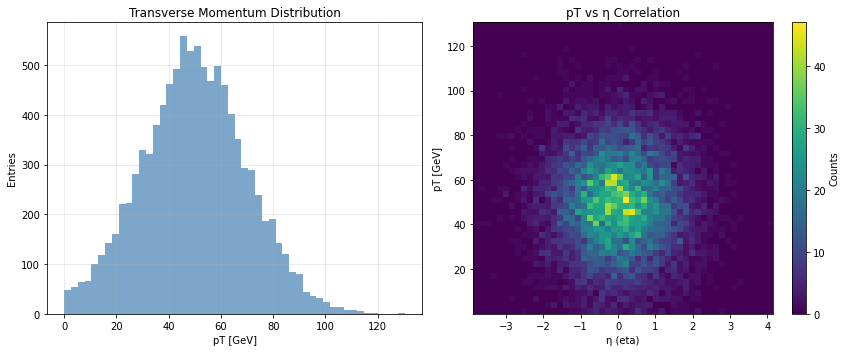

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ---- (1) Histogram of pT ----
axes[0].hist(df["pt"], bins=50, histtype='stepfilled', alpha=0.7, color='steelblue')
axes[0].set_xlabel("pT [GeV]")
axes[0].set_ylabel("Entries")
axes[0].set_title("Transverse Momentum Distribution")
axes[0].grid(True, alpha=0.3)

# ---- (2) 2D correlation plot: pT vs eta ----
h = axes[1].hist2d(df["eta"], df["pt"], bins=(50, 50), cmap="viridis")
fig.colorbar(h[3], ax=axes[1], label="Counts")
axes[1].set_xlabel("η (eta)")
axes[1].set_ylabel("pT [GeV]")
axes[1].set_title("pT vs η Correlation")

plt.tight_layout()
plt.show()

As an alternative `DataFrame.plot` as a convenience front-end to matplotlib. 

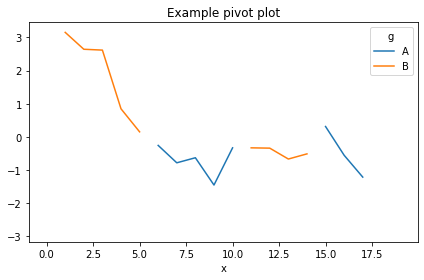

In [23]:
df = pd.DataFrame({'x': np.arange(20), 'y': np.random.randn(20).cumsum(), 'g': np.random.choice(['A','B'],20)})
ax = df.pivot_table(index='x', columns='g', values='y', aggfunc='mean').plot(title='Example pivot plot')
plt.tight_layout()
plt.show()

## A complete pipeline: cleaning and validating a dataset

Steps: load, inspect, coerce types, feature engineering or testing.

### Convert age to numeric, fill missing data

In [24]:
df = pd.DataFrame({'age':['25','30', 'unknown', '40'], 'income':['1000','2000','-','3000']})
# coerce
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['income'] = pd.to_numeric(df['income'].replace('-', np.nan), errors='coerce')
display(df)
print('after fill/validate:')
df['age'] = df['age'].fillna(df['age'].median())
df['income'] = df['income'].fillna(0)
df

,age,income
0,25.0,1000.0
1,30.0,2000.0
2,NaN,NaN
3,40.0,3000.0


after fill/validate:


,age,income
0,25.0,1000.0
1,30.0,2000.0
2,30.0,0.0
3,40.0,3000.0


### Rescaling features

In [25]:
from sklearn.preprocessing import StandardScaler

def scale_df(df, col,coln):
    df = df.copy()
    df[coln] = StandardScaler().fit_transform(df[[col]])
    return df

df = scale_df(df,"age","age_scaled")
display(df)

,age,income,age_scaled
0,25.0,1000.0,-1.147079
1,30.0,2000.0,-0.229416
2,30.0,0.0,-0.229416
3,40.0,3000.0,1.605910


### More feature engineering

In [26]:
df['income_per_age'] = df['income'] / df['age']
df['high_income'] = (df['income'] > 2000).astype(int)
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50], labels=['young', 'adult'])

print("\nDataFrame with derived features:")
display(df)


DataFrame with derived features:


,age,income,age_scaled,income_per_age,high_income,age_group
0,25.0,1000.0,-1.147079,40.000000,0,young
1,30.0,2000.0,-0.229416,66.666667,0,young
2,30.0,0.0,-0.229416,0.000000,0,young
3,40.0,3000.0,1.605910,75.000000,1,adult


### Testing DataFrame pipelines

pandas provides `pandas.testing.assert_frame_equal` for deterministic tests of transforms.

In [27]:
import pandas.testing as pdt
dfc = df.copy()
try: 
    pdt.assert_frame_equal(df,dfc)
    print("dfs are equal")
except: "dfs are different"

dfs are equal


### Visualization

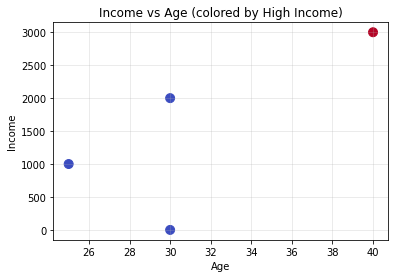

In [28]:
plt.figure(figsize=(6,4))
plt.scatter(df['age'], df['income'], c=df['high_income'], cmap='coolwarm', s=80)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income vs Age (colored by High Income)')
plt.grid(True, alpha=0.3)
plt.show()

## Performance tips and scaling

- Use vectorized operations
- Reduce memory with categorical dtypes
- Use `eval`/`query` for large expressions
- Consider Dask, Polars or PySpark for > RAM datasets
- Use chunked reading (`chunksize`) for large CSVs


### Exercises

1. Train with a messy socio-economic dataset stored in a CSV file ([people_data_large.csv](https://www.dropbox.com/scl/fi/n0s4h0ph8pzhvqomloril/people_data_large.csv?rlkey=amd4dq9bp5vcrlg3ieyyzxxvc&dl=1)
):
   - Load the dataset with `pandas.read_csv()` and inspect its shape, columns, and first few rows.  
   - Clean the data by replacing invalid entries (`"-"`, `"unknown"`, negative values) with `NaN`, converting types, and imputing or dropping missing values.  
   - Encode categorical variables (`city`, `has_car`, etc.) using label encoding and one-hot encoding (`pd.factorize`, `pd.get_dummies`).  
   - Create derived features such as `income_per_age`, `is_senior` (age > 60), and `log_income`, and optionally scale or normalize numerical variables.  
   - Compute correlations and visualize relationships with histograms, scatter/hexbin plots (`age` vs. `income`), and correlation heatmaps.


2. Data concatenation and merging: generate and merge multiple synthetic CSV files:

   - Create three small DataFrames (`people_part1.csv`, `people_part2.csv`, `people_part3.csv`) with overlapping but not identical columns (e.g. `age`, `income`, `city`, `education`, `has_car`).  
   - Save each DataFrame to disk with `to_csv()`, introducing small differences between them (missing columns, additional rows, or extra features).  
   - Load them back using `pd.read_csv()` and inspect column alignment and data consistency.  
   - Concatenate them vertically with `pd.concat([...], ignore_index=True)` and handle missing columns or conflicting types.  
   - Clean the merged dataset by filling or dropping `NaN`s and standardizing column names and types.  


3. Practice feature engineering using a dataset read from a ROOT file with `uproot`:

    - Read the ROOT file ([example.root](https://www.dropbox.com/scl/fi/138im0euyaof8ie111bg4/example.root?rlkey=egflvhlk6i58n13bhsh2d54zi&dl=1)
) into a pandas DataFrame and inspect its structure.  
    - Compute derived physics features, such as total momentum `p`, transverse mass `mt`, and energy `E`, from the existing kinematic variables.  
    - Aggregate data per event using `groupby("event_id")`, computing summaries like total and mean `pT`, total charge, and summed energy.  
    - Engineer ML-friendly features: normalized components (`px/p`, `py/p`, `pz/p`), transformations (`log(pT)`, `|η|`), and composite metrics (e.g. isolation-like variables).  
    - Visualize your results using histograms and 2D correlations to check distributions and relationships between engineered quantities.


### ++ Exercise

You are given a large synthetic dataset, [transactions_large.csv](
https://www.dropbox.com/scl/fi/978fvanm97etvopuep5wd/transactions_large.csv?rlkey=vazbdqpjjatwg8bz0f6bc1xhp&dl=1), containing ~10 million financial transactions with the following columns:

       - `user_id` (int): unique user identifier  
       - `timestamp` (datetime): simulated transaction time  
       - `region` (str): user region (`Europe`, `Asia`, `America`, `Africa`, `Oceania`)  
       - `category` (str): purchase category (`electronics`, `clothing`, `groceries`, `sports`, `entertainment`)  
       - `amount` (float): transaction amount in euros  
       - `is_fraud` (bool): simulated fraud flag (~2% of cases)
   - Load the dataset using a scalable data engine:
       - `Dask`: `import dask.dataframe as dd; df = dd.read_csv("transactions_large.csv")`
       - or `Polars`: `import polars as pl; df = pl.read_csv("transactions_large.csv")`
       - or `PySpark`: `spark.read.csv("transactions_large.csv", header=True, inferSchema=True)`
   - Compute and visualize:
       - total number of transactions and total amount per region  
       - average and median amount per category  
       - percentage of fraudulent transactions overall and per region  
   - Filter the data to select:
       - transactions above €1000  
       - fraudulent transactions in `Europe` or `America`  
       - activity in the last simulated month  
   - Visualize the filtered results using `matplotlib` or `seaborn`.  
   - Compare the time and memory usage of these operations when executed with pandas vs. your chosen backend (`Dask`, `Polars`, or `PySpark`).


